# **ภานพงศ์ สนไชย 6610210301**

# Lab03 - Filtering

In this exercise, you will learn how to work with HSV and HSL color space. We will:
lab2 ไม่ใช่แลบนี้
<!-- 1. Load an image in RGB using Pillow.  
2. Convert from RGB to HSV and HSL.  
3. Visualize and manipulate each channel (Hue, Saturation, Value/Lightness).  
4. Build a simple color-threshold filter on the HSV/HSL representation. -->


## 2.1 Setup

First, make sure you have installed the required libraries and check what is your *present working directory*:

In [1]:
!pip install numpy pillow
!echo "Your current directory is: $(pwd)"

Your current directory is: /content


## 2.2 Utility Function
You are provided some utility functions for readeing, writing, and rendering images.

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import colorsys

%matplotlib inline

# Utility functions to read, to display, and to save an image

def read_img(path, greyscale=True):
    img = Image.open(path)
    if greyscale:
        img = img.convert('L')
    else:
        img = img.convert('RGB')
    return np.array(img).astype(float)


def show(img_array, cmap=None, title=""):
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.title(title)
    if cmap is None:
        plt.imshow(img_array, cmap="gray", vmin=0, vmax=255)
    else:
        plt.imshow(img_array, cmap=cmap, vmin=0, vmax=255)
    plt.show()


def save_img(img, path):
    img = img - img.min()
    img = img / img.max()
    img = (img * 255).astype(np.uint8)
    img = Image.fromarray(img)
    img.save(path)
    print(path, "is saved!")

## 2.3 Image Padding
Supports padding modes: 'valid' (no padding), 'same', 'full'. Fill options: 'zeros', 'clamp', 'mirror', 'wrap'.

Behavior:
- For 'same' padding we pad so output from convolution with kernel of size kxk matches input size (floor(k/2) on each side).
- For 'full' padding we pad so every overlap (including partial) is computed (pad = k-1).
- For 'valid' we return original image unpadded.

In [34]:
#search about numpy pad

def pad_image(image, padding_size=0, fill='zeros'):
    if fill == 'zeros':
        padded_image = np.pad(image,pad_width=padding_size,mode="constant",constant_values=0)
    elif fill == 'clamp':
        padded_image = np.pad(image,pad_width=padding_size,mode="edge")
    elif fill == 'mirror':
        padded_image = np.pad(image,pad_width=padding_size,mode="symmetric")
    elif fill == 'wrap':
        padded_image = np.pad(image,pad_width=padding_size,mode="wrap")
    else:
        raise ValueError("Invalid fill option. Choose from 'zeros', 'clamp', 'mirror', 'wrap'.")
    return padded_image

## 2.4 Convolution
Function signature: convolution(image_np, kernel, padding_mode='same', fill='zeros')

In [35]:
def convolution(image, kernel, padding='same'):
    if padding == 'valid':#ไม่pad
        pad_size = 0
    elif padding == 'same':
        pad_size =  kernel.shape[0]//2
    elif padding == 'full':
        pad_size = kernel.shape[0]-1
    else:
        raise ValueError("Invalid padding option. Choose from 'valid', 'same', 'full'.")

    padded_image = pad_image(image, pad_size, fill='zeros')
    output = np.zeros_like(image)#สร้าง metrix เปล่าๆ
#กูเขียน
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
          #เอาแถวที่i-i+kernel
            region = padded_image[i:i+kernel.shape[0],j:j+kernel.shape[1]]
            output[i, j] = np.sum(region*kernel)

    return output


In [46]:
    from google.colab import files
    uploaded = files.upload()

Saving robloxhie1.jpg to robloxhie1.jpg


## 2.5 Test Padding and Convolution


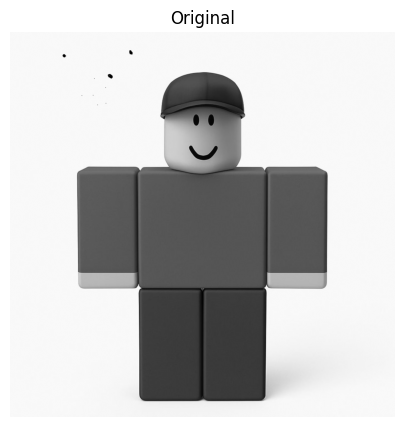

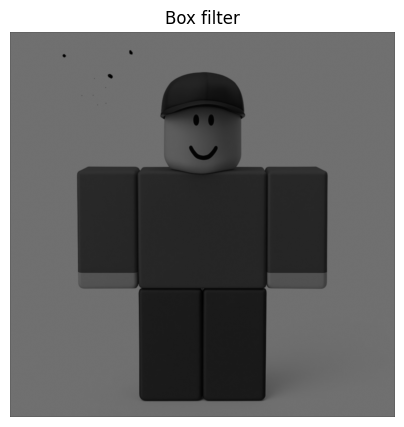

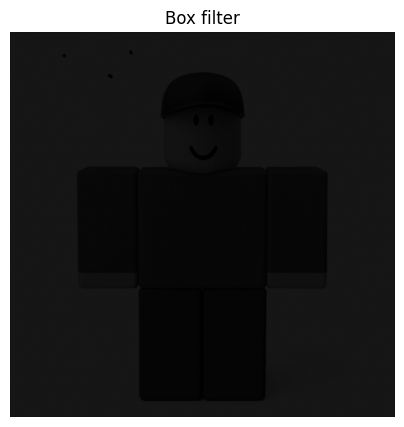

In [48]:
img = read_img("/content/robloxhie1.jpg", greyscale=True)
show(img, title="Original")

impulse_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
out_img = convolution(img, impulse_kernel, padding='same')
show(out_img,title="kuy")
# Define kernels
shift_up = np.array([[0, 0, 0], [0, 0, 0], [0, 1, 0]])
shift_down =np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]])
shift_left = np.array([[0, 0, 0], [0, 0, 1], [0, 0, 0]])
shift_right = np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]])
box_filter = np.array([[1/20, 1/20, 1/20], [1/20, 1/20, 1/20], [1/20, 1/20, 1/20]])
box_filter1 = np.ones((3,3))/99
out_img = convolution(img, shift_up, padding='same')
show(out_img, title="Shift up")

out_img = convolution(img, shift_down, padding='same')
show(out_img, title="Shift down")

out_img = convolution(img, shift_left, padding='same')
show(out_img, title="Shift left")

out_img = convolution(img, shift_right, padding='same')
show(out_img, title="Shift right")
out_img = convolution(img, box_filter, padding='same')
show(out_img, title="Box filter")

out_img = convolution(img, box_filter1, padding='same')
show(out_img, title="Box filter")

In [72]:
x = np.array([[1, 2], [3, 4]])

for i,j in x:
    print(i)

1
3


## 2.6 Gaussian filter
Implement gaussian_filter(image, kernel_size, variance) and a variant that computes kernel size automatically from variance.

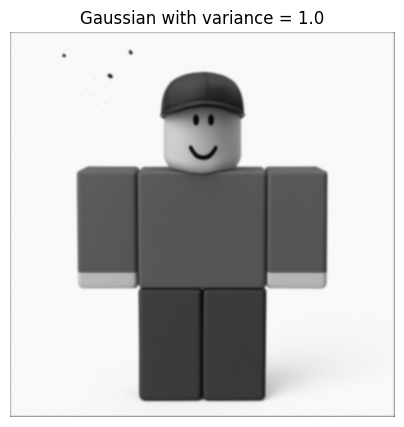

kernel_size=19


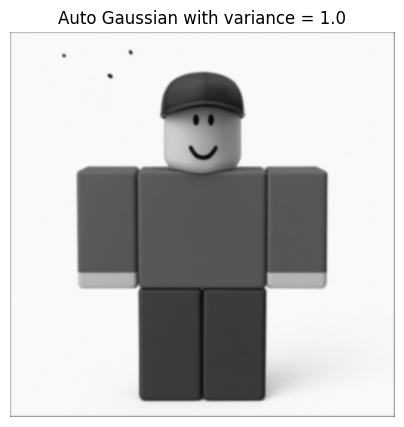

In [ ]:
# Gaussian filter function
#kernel size is square w=h then can call kernel_size
def gaussian_filter(image, kernel_size, variance):

    #chatgpt call arange?
    # k = kernel_size // 2
    # kernel_space = np.arange(-k, k + 1)
    kernel_space=np.linspace((-kernel_size//2),(kernel_size//2),kernel_size) #got numpy array
    #numpy meshgrid
    u,v=np.meshgrid(kernel_space,kernel_space)
    kernel = np.exp(-(u**2 + v**2) / (2 * variance)) / (2 * np.pi * variance)
    kernel/=np.sum(kernel)
    return convolution(image, kernel, padding='same')

# Automatic Gaussian filter kernel size
def auto_gaussian_filter(image, variance):
    kernel_size = int(6*np.sqrt(variance)+1)
    print(f"kernel_size={kernel_size}")
    return gaussian_filter(image, kernel_size, variance)

# Test Gaussian functions
out_img = gaussian_filter(img, 35, 9.0)
show(out_img, title="Gaussian with variance = 1.0")

out_img = auto_gaussian_filter(img, 9.0)
show(out_img, title="Auto Gaussian with variance = 1.0")

## 2.7 Median filter

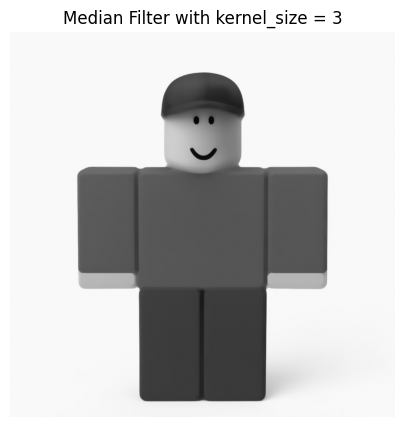

In [76]:
def median_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded_image = pad_image(image, (pad_size, pad_size), fill='mirror')
    output = np.zeros_like(image)

    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region= padded_image[i:i+kernel_size,j:j+kernel_size]
            output[i, j] = np.median(region)

    return output

# Test Median Filter
out_img = median_filter(img, 20)
show(out_img, title="Median Filter with kernel_size = 3")

## 2.8 Simple sharpening function
A common unsharp-mask style: sharpened = original + alpha * (original - blurred)
sharpen(image, sigma, alpha)

kernel_size=19


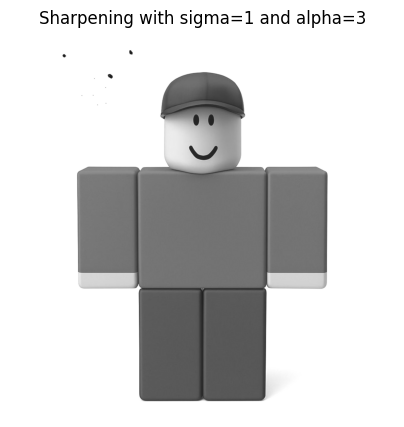

In [82]:
def sharpen(image, sigma, alpha):
    blurred = auto_gaussian_filter(image,sigma*sigma)
    details=image-blurred
    sharpened = image+alpha*sigma
    return np.clip(sharpened, 0, 255)

# Test Sharpening Filter
out_img = sharpen(img, 3, 10)
show(out_img, title="Sharpening with sigma=1 and alpha=3")